<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_120_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 120: Feature Reduction Using PCA and RFE

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**| Feature Reduction using PCA and RFE |
|||
|**Class Description**|In this class, a student will perform feature engineering using both dimensionality reduction algorithms i.e. PCA and RFE.|
|||
|**Class**|C120|
|||
|**Class Time**|45 minutes|
|||
|**Goal**|Reduce the number of features using PCA and RFE|
||Compare classification model's performance built using PCA and RFE features|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous class, we had done preliminary analysis on the forest cover dataset and performed data cleaning activities to make it ready for feature engineering.

In this class, we will test two algorithms: **PCA** and **RFE** which are commonly used for feature reduction on the given dataset. Thereafter, we will compare the performance for both algorithms.

Before that, let us revisit the forest cover problem statement and recall the activities done in the previous class and start this lesson from **Activity 1: Feature Engineering Using PCA**.


---

####Problem Statement

You are given a dataset consisting of forest cover type for $7$ types of trees that predominantly grow in a particular geographic area. The data is acquired for $4$ wilderness areas located in the Roosevelt National Forest of northern Colorado, United States. (**wilderness** refers to natural environments on earth that have minimum/negligible human interference.

You need to build a classifier model to predict the forest cover type based on geographical features.

**Understanding the Dataset:**

The dataset has $2160$ observations for each of the following $7$ forest cover types (trees). Click the tree name link to know more about the respective tree.

**`Target Label`**: `Cover_Type` (integers `1` to `7`) - Forest Cover Type (Tree Type) designation:

<center>

`1` - [Spruce/Fir tree](https://en.wikipedia.org/wiki/Spruce)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/f696de10-0a55-4ef0-ae8e-25586e9339f4.jpg width='300'>

Image by: By The original uploader was MPF at English Wikipedia. - Transferred from en.wikipedia to Commons., CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2440504

<br>

`2` - [Lodgepole Pine tree](https://en.wikipedia.org/wiki/Pinus_contorta)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b5243445-5da6-4712-b312-5ee663e51eaa.jpeg width='300'>

Image by: By stereogab - Western Pines, CC BY-SA 2.0, https://commons.wikimedia.org/w/index.php?curid=11341935

<br>

`3` - [Ponderosa Pine tree](https://en.wikipedia.org/wiki/Pinus_ponderosa)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/856d8d81-c01d-4e3c-8045-6ab88f94b9e8.jpeg width='300'>

Image by: By Jason Sturner - Custer State Park, Pahá Sápa (Black Hills), South Dakota, CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=10487324

<br>

`4` - [Cottonwood/Willow tree](https://en.wikipedia.org/wiki/Willow)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c3d28806-dedc-4858-b87e-532184115fa6.jpeg width='300'>

Image by: Sb2s3 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=44184869

<br>

`5` - [Aspen tree](https://en.wikipedia.org/wiki/Aspen)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/4390f2a8-93a7-4b83-8f4a-266ecf0e7d54.jpg width='300'>

Image by: By Doug Dolde at English Wikipedia - Contax 645, 120mm, Leaf Aptus 75S, Public Domain, https://commons.wikimedia.org/w/index.php?curid=21714613

<br>

`6` - [Douglas-fir tree](https://en.wikipedia.org/wiki/Douglas_fir)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/a4d89f9c-77a7-43c5-a492-0253d64f23e5.jpg width='300'>

Image by: By Dave Powell, USDA Forest Service - This image is Image Number 1210046 at Forestry Images, a source for forest health, natural resources and silviculture images operated by The Bugwood Network at the University of Georgia and the USDA Forest Service., CC BY 3.0 US, https://commons.wikimedia.org/w/index.php?curid=5311562

<br>

`7` - [Krummholz tree](https://en.wikipedia.org/wiki/Krummholz)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/8827ad95-d0e0-480a-be1a-68f6febb8d27.jpeg width='300'>

Image by: John Spooner - flickr.com, CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=5007578
</center>

The dataset has **54 features** which can broadly be divided into two categories:
1. `Geographical fields` (14 features): These features are based on location and other geographical parameters of the patch.

2. `Soil type` (40 features): These features consists of details on the type of soil found in the patch.

**Geographical Fields:**

1. `Elevation` - Elevation in meters.

2. `Aspect` - Aspect in degrees azimuth*.

3. `Slope` - Slope in degrees.

4. `Horizontal_Distance_To_Hydrology` - Horizontal distance to nearest source  of surface water.

5. `Vertical_Distance_To_Hydrology` - Vertical distance to nearest source of surface water.

6. `Horizontal_Distance_To_Roadways` - Horizontal distance to nearest roadway.

7. `Horizontal_Distance_To_Fire_Points` - Horizontal distance to nearest wildfire ignition points.

8. `Hillshade_9am` (0 to 255 index) - Hillshade index at 9am, summer solstice*.

9. `Hillshade_Noon` (0 to 255 index) - Hillshade index at noon, summer solstice.

10. `Hillshade_3pm` (0 to 255 index) - Hillshade index at 3pm, summer solstice.

- `Wilderness_Area` (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation where the study has been carried. The wilderness areas are:

  ```
11 - Rawah Wilderness Area
12 - Neota Wilderness Area
13 - Comanche Peak Wilderness Area
14 - Cache la Poudre Wilderness Area
  ```

**Soil Type fields:**

`Soil_Type`: These fields indicate the type of soil found in the respective study area
It consists of 40 binary columns where, 0 = absence or 1 = presence of the respective soil type. . Various **soil types** are:

  ```
1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.
  ```

[*azimuth](https://en.wikipedia.org/wiki/Azimuth): Azimuth angle gives the compass angle/direction with respect to North which is considered as $0^o$.

[*summer solstice](https://en.wikipedia.org/wiki/Summer_solstice): The longest day of summer (June $21^{st}$) when the Earth poles have maximum tilt towards the Sun.

<br>

**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/covertype

Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.

**Donors of database:**

1. Jock A. Blackard (jblackard '@' fs.fed.us)
GIS Coordinator
USFS - Forest Inventory & Analysis
Rocky Mountain Research Station
507 25th Street
Ogden, UT 84401

2. Dr. Denis J. Dean (denis.dean '@' utdallas.edu)
Professor
Program in Geography and Geospatial Sciences
School of Economic, Political and Policy Sciences
800 West Campbell Rd
Richardson, TX 75080-3021

3. Dr. Charles W. Anderson (anderson '@' cs.colostate.edu)
Associate Professor
Department of Computer Science
Colorado State University
Fort Collins, CO 80523 USA

---

#### Importing Modules and Reading Data



In [ ]:
# Import the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Read the dataset and print first five records.
df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/ccf634ae-55a4-4b49-9ef4-9a137c5c07fe.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [ ]:
# Let's drop the Id column and verify the removal from the dataset.
df.drop(['Id'], axis = 1, inplace = True)
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
# Get the counts of tree types to verify the counts given in the dataset
df['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

---

#### Exploratory Data Analysis

1. Split the DataFrame into features and target variables.
2. Make a list of continuous features.
3. Create a pivot table with `Cover_Type` as index and the list of continous features as values.
4. Visualize the continuous features using boxplots.
5. Drop all the redundant features.




In [ ]:
# Split the features and target into separate DataFrames
features_df = df.copy(deep = True).drop(['Cover_Type'], axis = 1)
covertype_df = df['Cover_Type']

In [ ]:
# Obtain a list of continuous features
continuous_features = []
for feature in features_df.columns:
  if features_df[feature].nunique() > 2:
    continuous_features.append(feature)

print("Continuous Features:\n", continuous_features)
print('Count of continuous features:', len(continuous_features))

Continuous Features:
 ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Count of continuous features: 10


In [ ]:
# Display the mean values of the continuous columns with respect to tree type.
cover_pivot_table = pd.pivot_table(df, index = 'Cover_Type', values = df[continuous_features])
cover_pivot_table

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology
Cover_Type,,,,,,,,,,
1,159.463426,3128.025926,144.065741,211.690278,223.248611,1994.412963,271.507407,2579.715741,13.112963,41.281481
2,151.097222,2922.540278,142.950926,214.044444,225.369907,2155.277315,287.728704,2425.791667,13.423611,47.337963
3,173.672685,2398.423148,141.549537,201.655556,216.561111,916.909722,210.723148,969.595833,20.628704,64.081944
4,138.099537,2223.420370,111.808796,227.968056,216.889815,860.540741,104.537500,915.100463,18.468519,40.143519
5,137.992130,2786.801389,121.392593,223.368981,218.317130,1530.388889,208.873148,1329.318519,16.724537,50.871296
6,180.617130,2423.276852,147.682407,193.562963,209.960648,1057.654167,160.095370,1064.980556,18.986111,44.873611
7,155.794444,3362.769907,136.193981,216.639815,222.412037,2062.847222,346.904630,2713.659722,14.166667,68.945833


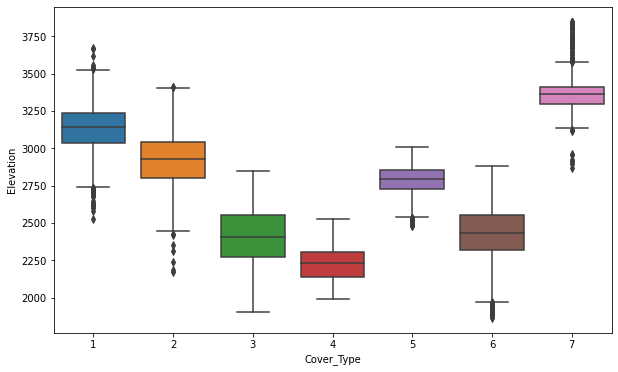

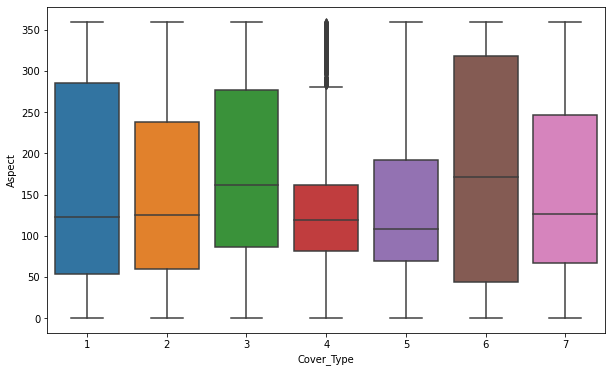

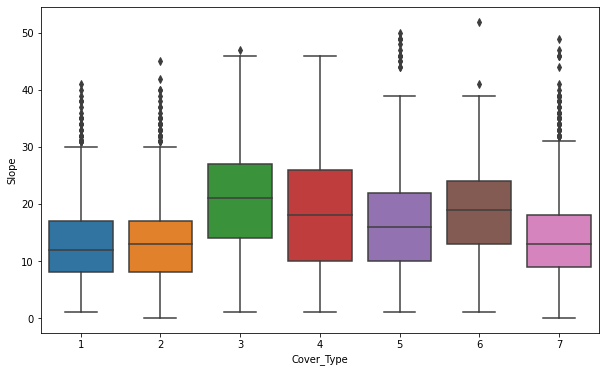

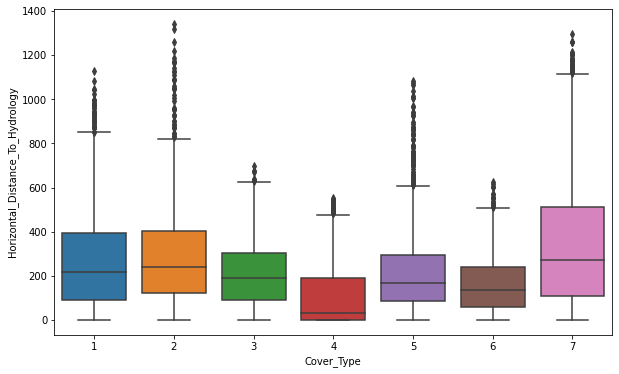

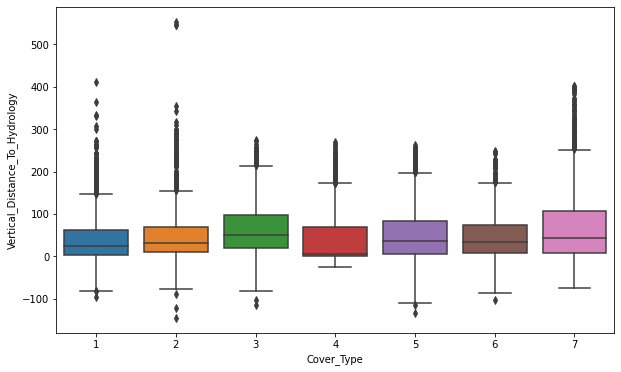

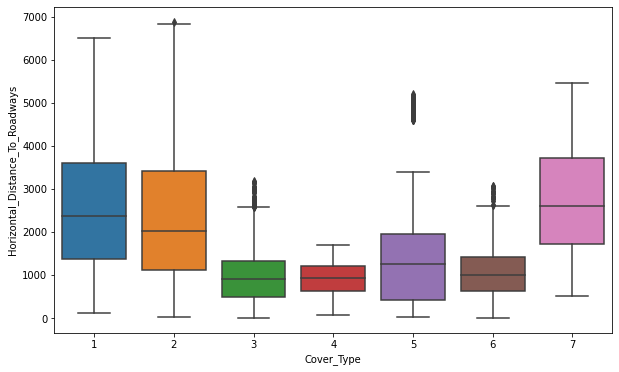

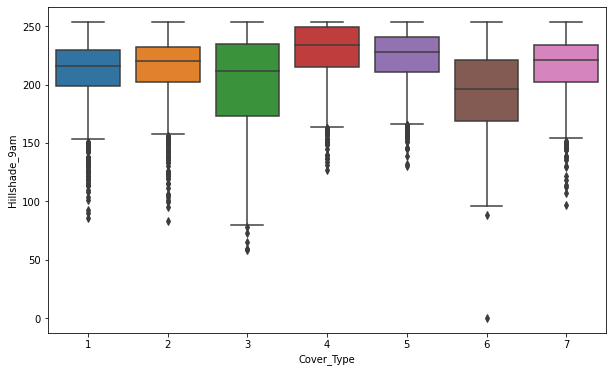

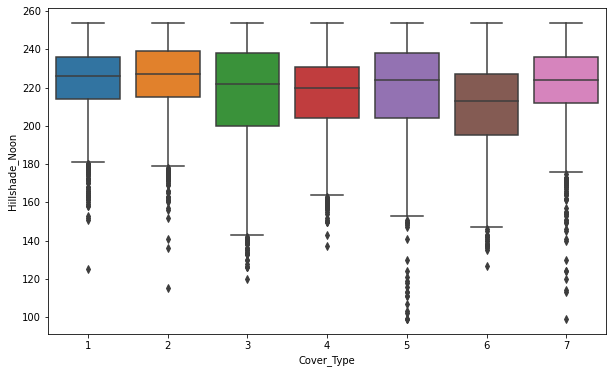

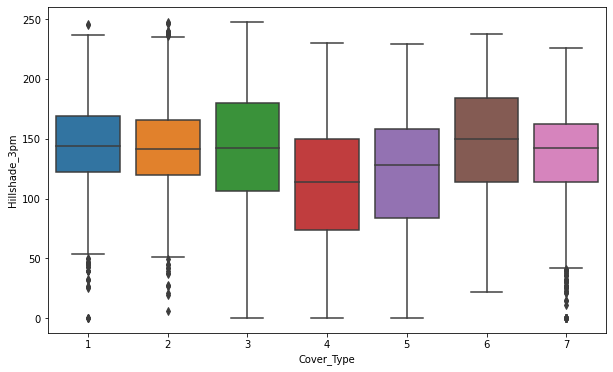

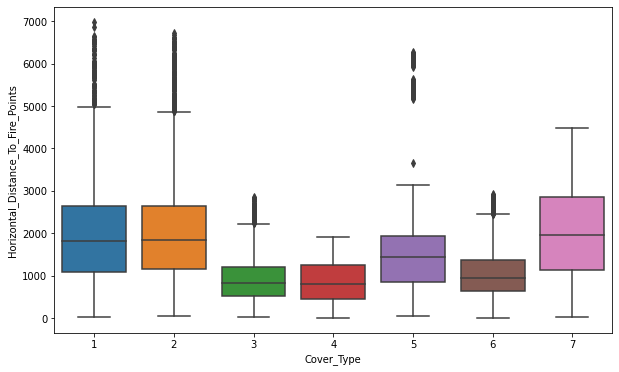

In [ ]:
# Obtain boxplot for all continuous features
for feature in continuous_features:
    plt.figure(figsize = (10, 6))
    sns.boxplot(y = features_df[feature], x = covertype_df)
    plt.show()

In [ ]:
# Obtain the statistical description for continuous features in the dataset.
df[continuous_features].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [ ]:
# Get the counts of values for 'Soil_Type7' and 'Soil_Type15' features

print("For Soil_Type7 feature:", features_df['Soil_Type7'].value_counts())
print("\nFor Soil_Type15 feature:", features_df['Soil_Type15'].value_counts())

For Soil_Type7 feature: 0    15120
Name: Soil_Type7, dtype: int64

For Soil_Type15 feature: 0    15120
Name: Soil_Type15, dtype: int64


In [ ]:
# Drop the redundant features.
features_df.drop(['Soil_Type7','Soil_Type15'], axis = 1, inplace = True)
features_df.shape

(15120, 52)

---

#### Correlation Analysis and Data Normalisation

1. Create a correlation heatmap.
2. Create DataFrames for continuous features and binary features and normalize the values.

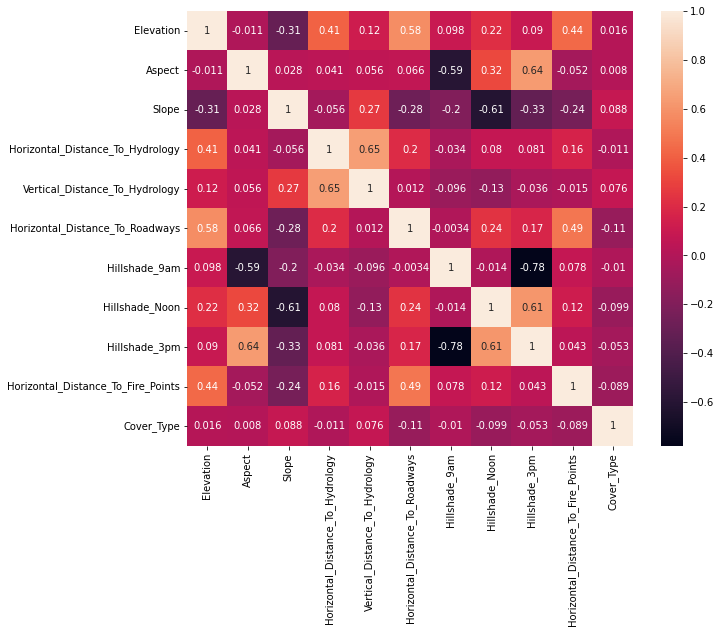

In [ ]:
# Create a correlation heatmap
corr_df = features_df[continuous_features].join(covertype_df).corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_df, annot = True)
plt.show()

In [ ]:
# Create separate DataFrames for continuous features and binary features

continuous_features_df = features_df[continuous_features]
binary_features_df = features_df.drop(continuous_features, axis=1)

print('Shape of Continuous features: ', continuous_features_df.shape)
print('Shape of Binary features: ', binary_features_df.shape)

# Normalise the continuous features

standard_scaler = StandardScaler()
scaled_values = standard_scaler.fit_transform(continuous_features_df)
scaled_continuous = pd.DataFrame(scaled_values)
scaled_continuous.columns = continuous_features_df.columns

# Join the scaled continuous features and binary features and verify the DataFrame

scaled_features_df = scaled_continuous.join(binary_features_df)
scaled_features_df

Shape of Continuous features:  (15120, 10)
Shape of Binary features:  (15120, 42)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,-1.397379,1.404943,1.719366,-0.208335,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,1.187676,0.089223,-0.960742,-0.169240,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,1.220398,0.045366,-1.135058,-0.294706,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,0.533231,0.790940,-0.350637,-0.526545,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let us now perform feature reduction using the `sklearn` PCA and reduce the dimensionality of the high-dimensional forest cover dataset.


---

#### Activity 1: Feature Engineering Using PCA

First let's proceed with PCA. We can reduce our 52-dimensional dataset to either 2D or 3D, but we want to retain at least 90% of the information or variance in the reduced dataset. Thus, we need to determine how much percentage of variance each principal component carries.

Recall that in `sklearn` PCA, we can use the following attributes  with the `PCA` object (for instance, `pca_obj`):
- `pca_obj.components_`: To determine principal axis in feature space.
- `pca_obj.explained_variance_`: To determine the amount of variance explained by each of the components.
- `pca_obj.explained_variance_ratio_:`  To determine the percentage of variance explained by each of the components.

Use the `explained_variance_ratio_` attribute to determine the percentage of variance explained by all the 52 components. For this,
1. Pass `n_components = 52` to the `PCA` constructor.
2. Call the `fit_transform()` function on the PCA object and pass the scaled dataset `scaled_features_df` as input to this function.


In [ ]:
# S1.1: Determine explained_variance_ratio of 52 PCs.
from sklearn.decomposition import PCA
pca_obj = PCA(n_components = 52)
pca_52d = pca_obj.fit_transform(scaled_features_df)
print("Percentage of variance explained by each PC:", np.round(pca_obj.explained_variance_ratio_, 3))

Percentage of variance explained by each PC: [0.254 0.206 0.158 0.095 0.052 0.043 0.039 0.029 0.022 0.021 0.011 0.007
 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.002
 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


In the above output, you can observe that first principal component explains approx $25.4\%$ of variance, second component explains approx $20.6\%$ of variance and so on. Thus, first 2 components explains approx $46\%$ ($25.4\%$ + $20.6\%$) of variance. This $46\%$ is nothing but the **cumulative sum of variances** upto 2 components.

Let us calculate the cumulative variance of 52 principal components using cumulative sum function `cumsum()` of `numpy` module.


In [ ]:
# T1.1: Calculate cumulative explained variance ratio
cumulative_exp_var = np.cumsum(pca_obj.explained_variance_ratio_)
cumulative_exp_var

array([0.25441241, 0.46079644, 0.61924982, 0.71382646, 0.76546362,
       0.80893284, 0.84750073, 0.87606882, 0.89850416, 0.91974438,
       0.93046945, 0.93786181, 0.94325094, 0.94778961, 0.95196312,
       0.95596266, 0.95978627, 0.96344114, 0.96703212, 0.97045649,
       0.97370358, 0.97665758, 0.97918002, 0.98154018, 0.98368161,
       0.98575298, 0.98773614, 0.98954324, 0.99118394, 0.99266795,
       0.99381888, 0.99480029, 0.99573297, 0.99652686, 0.99718711,
       0.99782231, 0.99821779, 0.99853881, 0.99883218, 0.99909263,
       0.99933535, 0.99951507, 0.99964253, 0.99973554, 0.9998216 ,
       0.99988135, 0.99993696, 0.99998833, 0.99999432, 1.        ,
       1.        , 1.        ])

Thus, first 2 components hold approx $46\%$ of variance, first 3 components hold approx $61.9\%$ variance and so on.

Let us visualise the above cumulative sum of variances for all 52 principal components by creating a line plot.


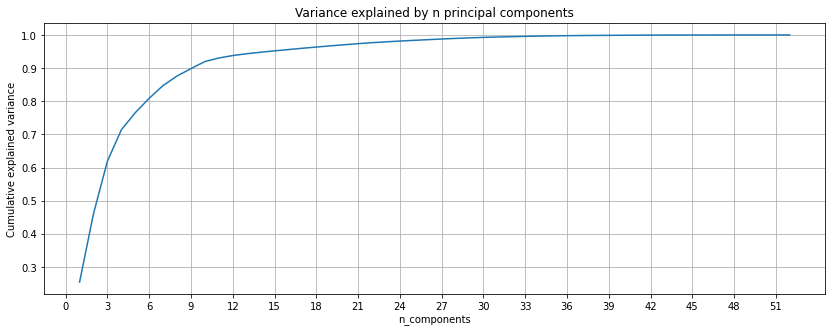

In [ ]:
# S1.2: Create a line plot with components on x-axis and their cumulative sum on y-axis.
plt.figure(figsize = (14, 5))
plt.plot(np.arange(1, 53), cumulative_exp_var)
plt.title('Variance explained by n principal components')
plt.grid()
plt.xticks(range(0, 52, 3))
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.show()

In the above graph, we can observe that $90\%$  of variance is obtained at `n_components = 9`. This means that if we reduce our 52-dimensional dataset into 9 dimensions, it would retain approx  $90\%$  of the information.

Thus, let us now apply `sklearn` PCA on the scaled DataFrame `scaled_features_df` and reduce it to 9 dimensions using the steps given below:



1. Import `PCA` from `sklearn.decomposition` module.
2. Pass the number of components/dimensions to the PCA constructor using the following syntax:

  **Syntax of PCA:** `PCA(n_components = None)`

  Where, `n_components` is the number of components to keep. As we are projecting the dataset into  9 dimensions, `n_components` would be `9` in this case. Also, pass `random_state = 42` to obtain same result on every execution.

3. Call the `fit_transform()` function on PCA object to obtain the new set of features or principal components.

4. Convert the array obtained after applying `fit_transform()` function to a DataFrame.





In [ ]:
# S1.3: Reduce the number of features from 52 to 9 using PCA.
pca = PCA(n_components = 9, random_state = 42)
pca_9d = pca.fit_transform(scaled_features_df)
pca_features_df = pd.DataFrame(pca_9d)
pca_features_df

,0,1,2,3,4,5,6,7,8
0,-1.442770,-1.707859,-1.515768,0.848458,3.574460,1.491572,-1.545609,0.081513,0.106286
1,-1.476829,-1.568211,-1.773372,0.806894,3.551692,1.499003,-1.593732,0.100753,0.006202
2,-2.249161,-2.192771,-0.487074,1.318046,3.025602,-0.284723,-0.688450,0.457944,0.110992
3,-1.735356,-2.190537,0.403932,1.525709,3.093297,-0.952984,-0.945573,0.960974,-0.390450
4,-1.356754,-1.576671,-1.866814,0.868950,3.506768,1.509603,-1.531426,0.193636,-0.182607
...,...,...,...,...,...,...,...,...,...
15115,-1.053839,2.386735,-0.234424,-0.173918,-0.221817,0.332357,-0.795730,1.149270,0.249800
15116,0.673280,-1.151144,2.352602,-2.115669,0.574018,-0.440759,-0.501644,0.461497,0.250796
15117,1.516333,-0.681179,1.099065,-1.209116,0.140927,-0.732427,-0.865441,0.775164,0.262073
15118,1.075442,0.466790,0.618832,-0.975891,-0.083784,-0.801334,-0.890208,1.336234,-0.205736


Thus, we have reduced the number of features from 52 to 9 by using PCA thereby retaining approx $90\%$ of information.

Now, let us build a classification model using these 9 features and evaluate the performance of this model.

---

#### Activity 2: Classification Using PCA Reduced Features

For our dataset, the `pca_features_df` DataFrame contains feature variables and `covertype_df` DataFrame contains the target variable.

Let us split the DataFrames into train and test sets for building a classification model. As the target variable `Cover_Type ` has 7 unique values (7 forest cover types), this is a **multi-class classification problem**. In such cases, set `stratify = covertype_df` inside `train_test_split()` function to obtain a balanced train/test dataset consisting of samples from each target label.

In [ ]:
# S2.1: Perform train-test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(pca_features_df, covertype_df, test_size = 0.3,
                                                    random_state = 42, stratify = covertype_df)
# Print the shape of train and test sets.
print("Shape of X_train:", X_train1.shape)
print("Shape of X_test:", X_test1.shape)
print("Shape of y_train:", y_train1.shape)
print("Shape of y_test:", y_test1.shape)

Shape of X_train: (10584, 9)
Shape of X_test: (4536, 9)
Shape of y_train: (10584,)
Shape of y_test: (4536,)


Let's proceed with **Support Vector Classifier** for the classifier design. We will use `GridSearchCV` to obtain the optimal classifier hyperparameters. Let us first recall what is `GridSearchCV` and how to use it.


**Recalling `GridSearchCV`:**

`GridSearchCV` is a library function that is a member of `sklearn.model_selection` package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

For detailed information: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

The `GridSearchCV` takes the following arguments:

- `estimator`: The estimator instance from scikit learn. In our case this will be `SVC()`.

- `param_grid`: The dictionary object that holds the hyperparameters you want to try.

- `scoring`: The evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric.

- `n_jobs`: The number of processes you wish to run in parallel for this task. If it is `-1`,  it will use all available processors.

Follow the steps given below to tune the hyperparameters needed for `SVC()` model:

1. Import `GridSearchCV` class from the `sklearn.model_selection` module.

2. Define dictionary, say `param_grid` to select which parameters from `SVC` class you want to run the optimisation. Let us set:

  - `gamma`: `[1, 0.1]`

  - `kernel`: `['rbf', 'poly', 'sigmoid']`

  - `random_state`: `[42]` (for consistent results)

3. Construct a SVC grid using `GridSearchCV` function with following inputs:

 - `SVC`: The classifier model we want to deploy.

 - `param_grid`: The set of parameters for which classifier performance would be evaluated.

 - `scoring`: Use `'accuracy'` as the scoring criteria.

4. Call the `fit()` function on the `grid` to find the best fit. Pass `X_train1` and `y_train1` as inputs.

5. Print the hyperparameters which exhibit highest score using `grid.best_estimator_`.

**Note:** It may take around $7$ minutes to run the next cell.

In [ ]:
# S2.2: Obtain the optimum classifier hyperparameters using GridSearchCV

# Import the required library
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for optimisation
param_grid = {'gamma': [1, 0.1], 'kernel': ['rbf', 'poly', 'sigmoid']}

# Training
grid = GridSearchCV(SVC(), param_grid, scoring = 'accuracy' , n_jobs = -1)
grid.fit(X_train1, y_train1)

# Print the best hyperparameters
print(grid.best_estimator_)

SVC(gamma=1)


Next, let's model the problem using the best hyperparameters obtained from `GridSearchCV`. For this:

 1. Create a `pca_svc` object of `SVC` class and pass the hyperparameters obtained from `GridSearchCV`, however set `random_state=42` to get consistent results.

 2. Call the `fit()` function on `pca_svc` object with `X_train1` and `y_train1`.

 3. Call the `predict()` function on the `pca_svc` object with `X_test1` as the input parameter.

 4. Evaluate the model accuracy using `accuracy_score()` function.

In [ ]:
# S2.3: Train an SVC model using the best hyperparameters.
from sklearn.metrics import accuracy_score

pca_svc = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
              probability=False, random_state=42, shrinking=True, tol=0.001,
              verbose=False)

# Fit the SVC model, perform prediction and determine the accuracy using 'accuracy_score()' function.
pca_svc.fit(X_train1, y_train1)
pca_svc_pred = pca_svc.predict(X_test1)
accuracy_score(y_test1, pca_svc_pred)

0.8024691358024691

The accuracy is around $80$% which is good accuracy score. However let's plot the confusion matrix and print the classification report to get an in-depth overview of the classifier performance.

              precision    recall  f1-score   support

           1       0.75      0.71      0.73       648
           2       0.71      0.62      0.66       648
           3       0.73      0.71      0.72       648
           4       0.88      0.96      0.92       648
           5       0.85      0.91      0.88       648
           6       0.76      0.76      0.76       648
           7       0.91      0.94      0.93       648

    accuracy                           0.80      4536
   macro avg       0.80      0.80      0.80      4536
weighted avg       0.80      0.80      0.80      4536



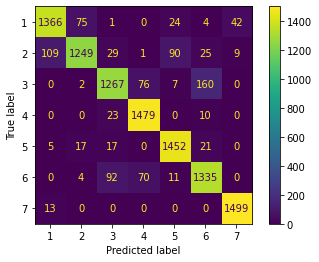

In [ ]:
# S2.4: Plot the confusion matrix and classification report for SVC classfier
from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(pca_svc, X_train1, y_train1, values_format = 'd')
print(classification_report(y_test1, pca_svc_pred))

Here we observe that the classifier exhibit good scores and we have low number of misclassified labels.

Next, let's check the accuracy that another feature reduction technique called **Recursive Feature Elimination (RFE)** exhibits for $9$ features.

---

#### Activity 3: Feature Engineering Using RFE

Let us first recall the RFE technique used for reducing the number of features of a dataset.
(Learned in Lesson: **Car Price Prediction using RFE**)

**Recalling RFE:**

RFE (Recursive Feature Elimination) is a feature selection or elimination  technique that fits a model and removes the weakest feature (or features). In RFE features are ranked by the model's `coef_` or `feature_importances_` attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in a machine learning model.

RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid. However, in order to compare the performance of RFE for features reduction with PCA, we will reduce the number of features to $9$ as obtained from PCA.

Perform the following steps to perform RFE for SVC classifier:

1. Import the `RFE` class from the `sklearn.feature_selection` module.

2. Create an object of `SVC` class, and set the kernel to `linear`. Let's name this object as `svc`.

3. Create an object of the `RFE` class. Let's name it as `rfe`. The constructor of the `RFE` object takes the object of `SVC` class (i.e. `svc`) and the number of features to be selected using RFE as inputs.

4. Call the `fit()` function on the `RFE` object and pass the features dataset (`scaled_features_df`) and target labels (`covertype_df`) as input to this function.

5. Create an array `rfe_features` to store the column names obtained from RFE using `support_` attribute on `scaled_features_df.columns`.

6. From the column index  stored in `rfe_features`, create a DataFrame for the reduced set of features and finally print the DataFrame.

**Note:** It may take around $2$ to $3$ minutes to run the next cell.


In [ ]:
# S3.1: Reduce number of feature to 9 using RFE feature extraction method

from sklearn.feature_selection import RFE

# Set SVC kernel
svc = SVC(kernel = 'linear')
rfe = RFE(svc, n_features_to_select=9)
rfe.fit(scaled_features_df, covertype_df)

# Obtain the feature list reduced by RFE and generate the DataFrame for reduced features
rfe_features = scaled_features_df.columns[rfe.support_]
print("Features obtained using RFE:", rfe_features)
rfe_features_df = scaled_features_df[rfe_features]
rfe_features_df

Features obtained using RFE: Index(['Elevation', 'Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type4', 'Soil_Type10', 'Soil_Type12', 'Soil_Type20',
       'Soil_Type24'],
      dtype='object')


,Elevation,Wilderness_Area1,Wilderness_Area3,Wilderness_Area4,Soil_Type4,Soil_Type10,Soil_Type12,Soil_Type20,Soil_Type24
0,-0.367095,1,0,0,0,0,0,0,0
1,-0.381461,1,0,0,0,0,0,0,0
2,0.130912,1,0,0,0,0,1,0,0
3,0.085421,1,0,0,0,0,0,0,0
4,-0.369489,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0,1,0,1,0,0,0,0
15116,-0.350335,0,1,0,1,0,0,0,0
15117,-0.616099,0,1,0,1,0,0,0,0
15118,-0.628070,0,1,0,1,0,0,0,0


From the above output, we can conclude that:

1. Among the continuous features,  only the `Elevation` feature seems of higher significance as per RFE feature extraction.

2. Among the four `Wilderness_Area`,  the `Wilderness_Area1`, `Wilderness_Area3` and `Wilderness_Area4` are more significant and have a diverse variety of trees.

3. Out of $40$ `Soil_Type` features, `Soil_Type4`, `Soil_Type10`, `Soil_Type12`, `Soil_Type20`, and `Soil_Type24` exhibit sufficient information to classify the growth of diverse tree types.


Thus, the `rfe_features_df` DataFrame now consists of the reduced dataset obtained after applying RFE. Let's calculate the VIF (Variance Inflation Factor) values for these reduced features to check if there exists any multicollinearity in the reduced dataset.

In [ ]:
# S3.2: Check for the VIF values for 9 features selected by RFE

# Import the 'variance_inflation_factor' module from 'statsmodels.stats.outliers_influence'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate VIF for the Reduced Features Set
vif = pd.DataFrame()
vif["Features"] = rfe_features_df.columns
vif["VIF"] = [variance_inflation_factor(rfe_features_df.values, i) for i in range(9)]
vif

,Features,VIF
0,Elevation,2.612495
1,Wilderness_Area1,1.328525
2,Wilderness_Area3,1.467032
3,Wilderness_Area4,2.199497
4,Soil_Type4,1.180295
5,Soil_Type10,1.393334
6,Soil_Type12,1.077658
7,Soil_Type20,1.023073
8,Soil_Type24,1.028068


All the VIF values less than $5$ which means that the reduced dataset features does not exhibit multicollinearity.

Next let's proceed with building a classification model using the reduced features obtained using RFE.

---

#### Activity 4: Classification using RFE Reduced Features


Our dataset has now been reduced to `rfe_features_df` DataFrame using RFE and now consists of $9$ features.  Let's perform a train test split on this reduced DataFrame.

Since we are performing **Multi-Label Classification**, set `stratify = covertype_df` inside the `train_test_split()` function to obtain a balanced train/test dataset consisting of samples from each target label.

In [ ]:
# S4.1: Perform train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(rfe_features_df, covertype_df, test_size = 0.3,
                                                    random_state = 42, stratify = covertype_df)
# Print the shape of train and test sets.
print("Shape of X_train:", X_train2.shape)
print("Shape of X_test:", X_test2.shape)
print("Shape of y_train:", y_train2.shape)
print("Shape of y_test:", y_test2.shape)

Shape of X_train: (10584, 9)
Shape of X_test: (4536, 9)
Shape of y_train: (10584,)
Shape of y_test: (4536,)


Let's proceed with **Support Vector Classifier** for the classifier design. We will use `GridSearchCV` to obtain the optimal classifier hyperparameters.

Perform  the same steps as done for PCA reduced features for hyperparameter tuning (**Activity 2: Classification Using PCA Reduced Features**):
1. Import `GridSearchCV` class from the `sklearn.model_selection` module.

2. Define dictionary, say `param_grid` to select which parameters from `SVC` class you want to run the optimisation. Let us set:

  - `gamma`: `[1, 0.1]`

  - `kernel`: `['rbf', 'poly', 'sigmoid']`

  - `random_state`: `[42]` (for consistent results)

3. Construct a SVC grid `grid` using `GridSearchCV` function with following inputs:

 - `SVC`: The classifier model we want to deploy.

 - `param_grid`: The set of parameters for which classifier performance would be evaluated.

 - `scoring`: Use `'accuracy'` as the scoring criteria.

4. Call the `fit()` function on the `grid` to find the best fit. Pass `X_train2` and `y_train2` as input.

5. Print the hyperparameters which exhibit highest score using `grid.best_estimator_`.

**Note:** It may take around $2$ to $3$ minutes to run the next cell.

In [ ]:
# S4.2: Obtain the optimum classifier hyperparameters using GridSearchCV

# Define the parameters grid for optimisation
param_grid = {'gamma': [1,0.1], 'kernel': ['rbf', 'poly', 'sigmoid']}

# Training
grid = GridSearchCV(SVC(), param_grid, scoring = 'accuracy' , n_jobs = -1)
grid.fit(X_train2, y_train2)

# Print the best hyperparameters
print(grid.best_estimator_)

SVC(gamma=1)


Next, let's model the problem using the best hyperparameters obtained from `GridSearchCV`. For this:

 1. Create a `rfe_svc` object of `SVC` class and pass the hyperparameters obtained from `GridSearchCV`, however set `random_state = 42` to get consistent results.

 2. Call the `fit()` function on `rfe_svc` object with `X_train2` and `y_train2`.

 3. Call the `predict()` function on the `rfe_svc` object with `X_test2` as the input paramter.

 4. Evaluate the model accuracy using `accuracy_score()` function.

In [ ]:
# S4.3: Support vector classifier for reduced features

rfe_svc = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
              probability=False, random_state=42, shrinking=True, tol=0.001,
              verbose=False)

# Fit the SVC model, perform prediction and determine the accuracy using 'accuracy_score()' function.
rfe_svc.fit(X_train2, y_train2)
rfe_svc_pred = rfe_svc.predict(X_test2)
accuracy_score(y_test2, rfe_svc_pred)

0.650352733686067

The accuracy is around $65$% which is certainly less than the classifier built using PCA based reduced features. However, let's plot the confusion matrix and print classification report for the classifier to see the classifier performance in detail.

              precision    recall  f1-score   support

           1       0.62      0.56      0.59       648
           2       0.63      0.36      0.46       648
           3       0.55      0.42      0.48       648
           4       0.71      0.92      0.80       648
           5       0.64      0.83      0.72       648
           6       0.54      0.55      0.55       648
           7       0.79      0.91      0.84       648

    accuracy                           0.65      4536
   macro avg       0.64      0.65      0.63      4536
weighted avg       0.64      0.65      0.63      4536



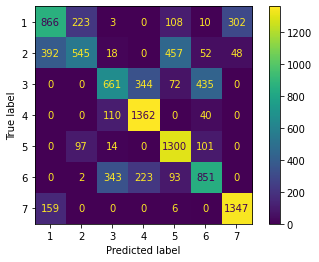

In [ ]:
# S4.4: Plot the confusion matrix and classification report for SVC classifier

plot_confusion_matrix(rfe_svc, X_train2, y_train2, values_format = 'd')
print(classification_report(y_test2, rfe_svc_pred))

The confusion matrix illustrates that the misclassified cases for the `rfe_svc` model are more as compared with `pca_svc` model.

Hence, we can conclude that for the given problem statement, the performance of **PCA** is far superior when compared with **RFE**.


---

#### Takeaway

Key takeaway points from dimensionality reduction:



1. Here we observed that for the given dataset **Principal Component Analysis** outperform **Recursive Feature Elimination** and reduces the effective features of the dataset up to a greater number while still giving better accuracy for classifier without overfitting.

2. The **RFE** retains the binary features in their original form and does not convert them into continuous features. However, **PCA** also converts the binary features to continuous. Hence we need to be careful while using PCA for problem statement which consists of binary features.

3. After reducing the features with RFE there might still exist multicollinearity between the selected features, hence **VIF** calculation should be performed after RFE to ensure that the selected features do not exhibit multicollinearity. However, PCA gives us the features which are orthogonal which means PCA inherently solves the problem of multicollinearity.

4. There is **no clear rule** which tells us that which feature reduction technique gives faster and optimum response, therefore the best way of feature reduction is application of various algorithms and verify the performance of these algorithms.



We will stop here. In the next class, we will  explore a new machine learning problem statement and learn a new classification algorithm.

---

#### Activities


**Teacher Activities:**

1.   Feature Engineering Using PCA and RFE (Class Copy)

	Link on Panel
2.     Feature Engineering Using PCA and RFE (Reference)

	https://colab.research.google.com/drive/1aXE60_ohWiRIMPT11rfXrLVb7i0H9Oji


---